In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Z:\\Sasindu\\Data set\\concrete_data.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
X = df.copy()
# Remove target
y = X.pop('Strength')

In [7]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [9]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

In [10]:
X = preprocessor.fit_transform(X)
y = np.log(y)

In [11]:
X

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [12]:
y

0       4.381902
1       4.125359
2       3.695607
3       3.714791
4       3.790985
          ...   
1025    3.790533
1026    3.439777
1027    3.165475
1028    3.489513
1029    3.478158
Name: Strength, Length: 1030, dtype: float64

In [13]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [8]


In [14]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

### Add loss and Optimizer.

In [17]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [18]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 1s 2ms/step - loss: 2.9778
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.5379
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0144
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7934
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7631
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6614
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6223
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5850
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5612
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5175
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4879
Epoch 13/200
9/9 [==============================] - 0s 2ms/st

9/9 [==============================] - 0s 1ms/step - loss: 0.1273
Epoch 105/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1423
Epoch 106/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1338
Epoch 107/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1251
Epoch 108/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1264
Epoch 109/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1324
Epoch 110/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1179
Epoch 111/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1192
Epoch 112/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1236
Epoch 113/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1209
Epoch 114/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1104
Epoch 115/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 116/200
9/9 [==============================] - 0

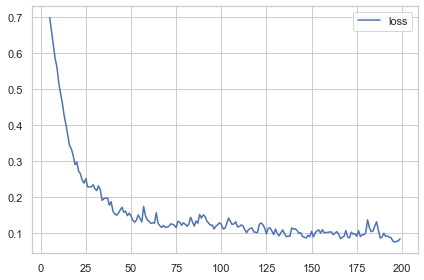

In [19]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

### Overfitting & underfitting.

In [20]:
X = df.copy()
# Remove target
y = X.pop('Strength')

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

In [23]:
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [8]


Minimum Validation Loss: 0.0798


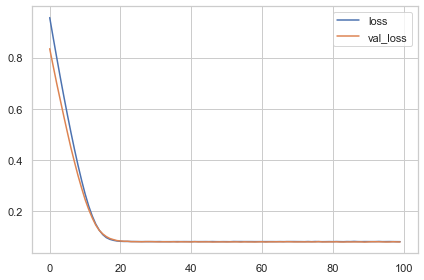

In [24]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=16,
    epochs=100,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.0798


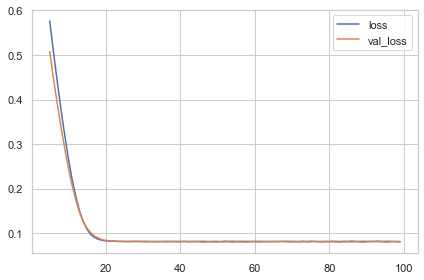

In [25]:
history_df.loc[5:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Epoch 1/50
25/25 [==============================] - 0s 5ms/step - loss: 0.1331 - val_loss: 0.1001
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0950 - val_loss: 0.0879
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0717 - val_loss: 0.0758
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0623 - val_loss: 0.0707
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0632
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0623
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0544
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0480 - val_loss: 0.0533
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0459 - val_loss: 0.0568
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0457 - val_loss: 0.0569
Epoch 11/50
25/25 [

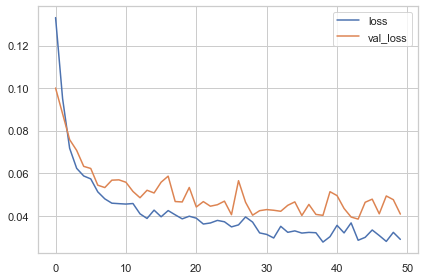

In [26]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

### Define Early Stopping Callback

In [27]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/50
25/25 [==============================] - 0s 5ms/step - loss: 0.1848 - val_loss: 0.1112
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1031 - val_loss: 0.0873
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0803 - val_loss: 0.0788
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0676 - val_loss: 0.0719
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.0825
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0614 - val_loss: 0.0643
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0582
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0559
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0558
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0487 - val_loss: 0.0583
Epoch 11/50
25/25 [

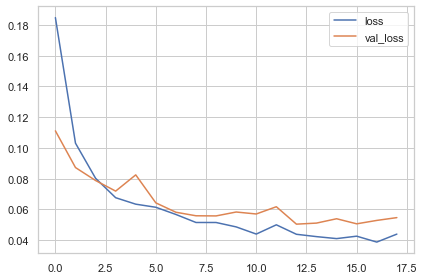

In [28]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

### Dropout

In [29]:
X = df.copy()
# Remove target
y = X.pop('Strength')

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

In [32]:
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [8]


In [33]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(1)
])

Minimum Validation Loss: 0.0577


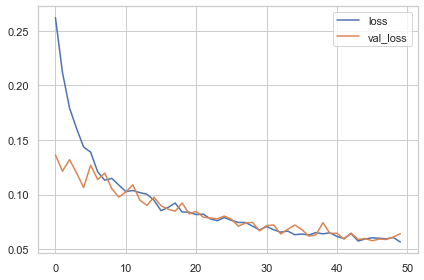

In [34]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

### Add Batch Normalization Layers

In [35]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

Minimum Validation Loss: 0.1612


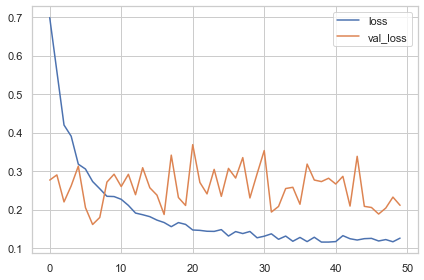

In [36]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 50
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))